In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

c:\users\mridul\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
train = pd.read_csv('E:\\train.csv')
test = pd.read_csv('E:\\test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#percentage of people survived the titanic in train
train['Survived'].sum()/len(train['Survived'])*100

38.38383838383838

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
total = train.isnull().sum().sort_values(ascending=False)
percent = total/len(train)*100
percent = round(percent,1)

In [10]:
df = pd.DataFrame([total,percent]).T
df.columns = ['Total','Percent']
df

,Total,Percent
Cabin,687.0,77.1
Age,177.0,19.9
Embarked,2.0,0.2
Fare,0.0,0.0
Ticket,0.0,0.0
Parch,0.0,0.0
SibSp,0.0,0.0
Sex,0.0,0.0
Name,0.0,0.0
Pclass,0.0,0.0


In [11]:
print(train.columns)
print(len(train.columns))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
12


In [12]:
#(train.groupby(['Sex','Survived']))['Age'].hist(alpha=0.2)

In [13]:
#train.groupby(['Sex','Survived'])['Age'].describe()

In [14]:
male_dead = train.set_index(['Sex','Survived']).loc['male',0]['Age'].values
male_survived = train.set_index(['Sex','Survived']).loc['male',1]['Age'].values

In [15]:
female_dead = train.set_index(['Sex','Survived']).loc['female',0]['Age'].values
female_survived = train.set_index(['Sex','Survived']).loc['female',1]['Age'].values

Text(0.5, 1.0, 'female')

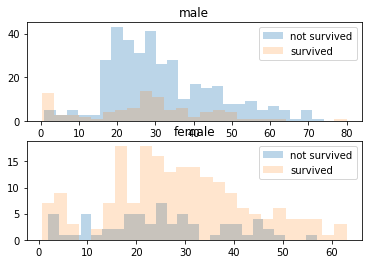

In [16]:
fig,ax = plt.subplots(2)
df = pd.DataFrame([male_dead,male_survived]).T
ax[0].hist(df[0],alpha=0.3,label = 'not survived',bins=25)
ax[0].hist(df[1],alpha=0.2,label = 'survived',bins=25)
ax[0].legend()
ax[0].set_title('male')

df = pd.DataFrame([female_dead,female_survived]).T
ax[1].hist(df[0],alpha=0.3,label = 'not survived',bins=25)
ax[1].hist(df[1],alpha=0.2,label = 'survived',bins=25)
ax[1].legend()
ax[1].set_title('female')

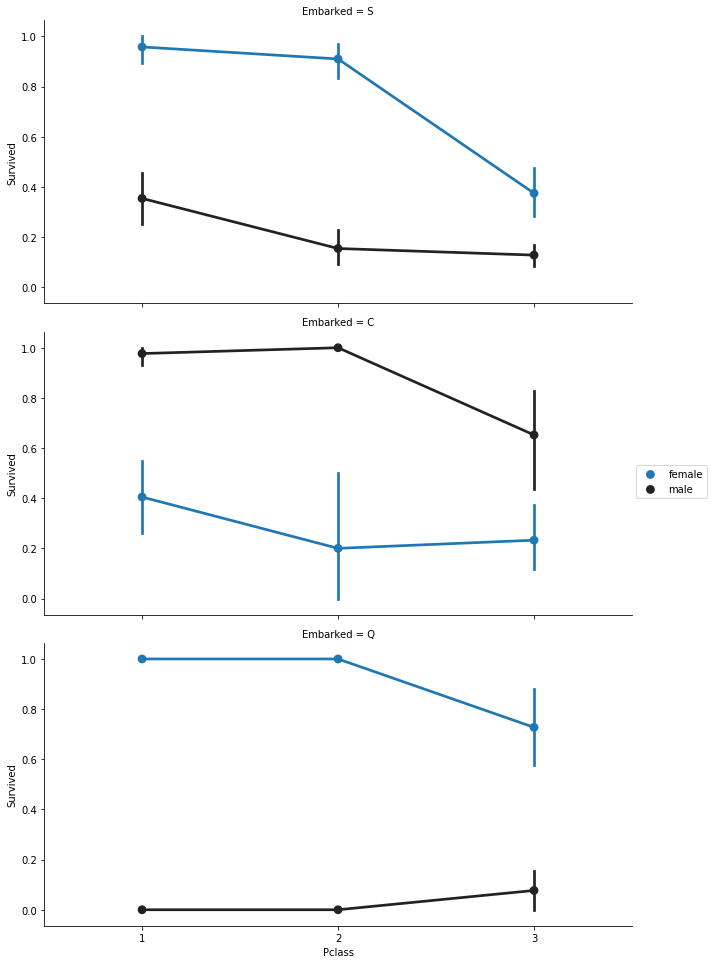

In [17]:
FacetGrid = sns.FacetGrid(train,'Embarked',size=4.5,aspect=2)
FacetGrid.map(sns.pointplot,'Pclass', 'Survived', 'Sex')
FacetGrid.add_legend()


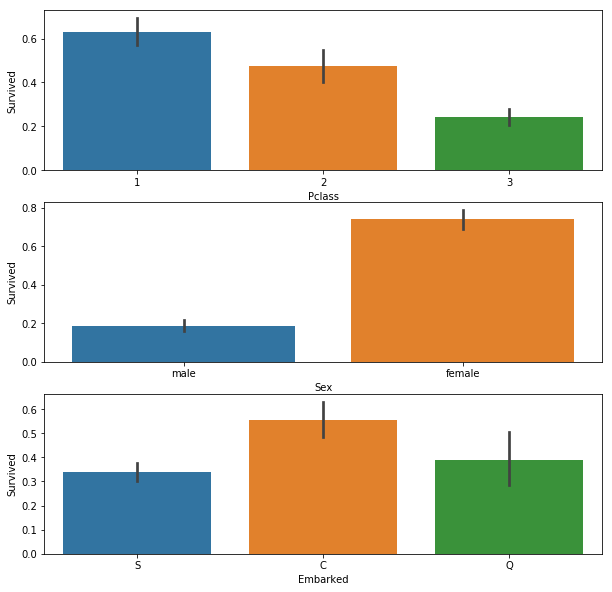

In [18]:
fig,ax = plt.subplots(3)
sns.barplot(x='Pclass',y='Survived',data = train, ax = ax[0])
sns.barplot(x='Sex',y='Survived',data = train, ax = ax[1])
sns.barplot(x='Embarked',y='Survived',data = train, ax = ax[2])
fig.set_figwidth(10)
fig.set_figheight(10)

In [19]:
data = [train,test]
for i in data:
    i['relatives'] = i['SibSp'] + i['Parch']
    i.loc[i['relatives']>0,'not_alone']=0
    i.loc[i['relatives']==0,'not_alone']=1

In [20]:
train['not_alone'].value_counts()

1.0    537
0.0    354
Name: not_alone, dtype: int64

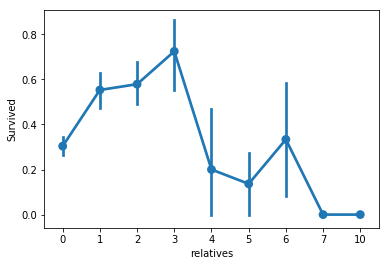

In [21]:
sns.pointplot('relatives','Survived',data=train,aspect=2.5)

In [22]:
train.drop('PassengerId',axis=1,inplace=True)
test.drop('PassengerId',axis=1,inplace=True)

In [23]:
#train.loc[train['relatives']==3,'Survived'].sum()

In [24]:
#train.loc[train['Survived']==1,'relatives'].value_counts()

In [25]:
#train.loc[train['Survived']==0,'relatives'].value_counts()

In [26]:
train_df = train.copy()
test_df = test.copy()

In [27]:
train_df['Cabin'] = train_df['Cabin'].str[:1]
train_df['Cabin'].fillna('U',inplace=True)

In [28]:
train_df['Cabin'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [29]:
data = [train_df, test_df]
for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and    is_null
    np.random.seed(42)
    rand_age = np.random.randint(mean - std, mean + std,
    size = is_null)
    # fill NaN values in Age column with random values    generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [30]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [31]:
#since two places then fill by using S
for data in [train_df,test_df]:
    data['Embarked'].fillna('S',inplace=True)

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Cabin        891 non-null object
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null float64
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 69.6+ KB


In [33]:
test_df['Cabin'] = test_df['Cabin'].str[:1]
test_df['Cabin'].fillna('U',inplace=True)

In [34]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Pclass       418 non-null int64
Name         418 non-null object
Sex          418 non-null object
Age          418 non-null int32
SibSp        418 non-null int64
Parch        418 non-null int64
Ticket       418 non-null object
Fare         417 non-null float64
Cabin        418 non-null object
Embarked     418 non-null object
relatives    418 non-null int64
not_alone    418 non-null float64
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 29.4+ KB


In [35]:
for dataset in [train_df,test_df]:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [36]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2}
for dataset in [train_df,test_df]:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset.Title.fillna(3,inplace=True)

In [37]:
for dataset in [train_df,test_df]:
    dataset.drop(['Name'],axis=1,inplace=True)

In [38]:
train_df.Ticket.nunique()

681

In [39]:
#train_df.Ticket
#no correlation can be seen there
#so dropping this column as well
for dataset in [train_df,test_df]:
    dataset.drop(['Ticket'],axis=1,inplace=True)

In [40]:
from sklearn.preprocessing import LabelEncoder
label_1 = LabelEncoder()
train_df['Sex'] = label_1.fit_transform(train_df['Sex'])
test_df['Sex'] = label_1.transform(test_df['Sex'])

label_2 = LabelEncoder()
train_df['Cabin'] = label_2.fit_transform(train_df['Cabin'])
test_df['Cabin'] = label_2.transform(test_df['Cabin'])

label_3 = LabelEncoder()
train_df['Embarked'] = label_3.fit_transform(train_df['Embarked'])
test_df['Embarked'] = label_3.transform(test_df['Embarked'])

In [41]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,not_alone,Title
0,0,3,1,22,1,0,7.2500,8,2,1,0.0,0.0
1,1,1,0,38,1,0,71.2833,2,0,1,0.0,2.0
2,1,3,0,26,0,0,7.9250,8,2,0,1.0,1.0
3,1,1,0,35,1,0,53.1000,2,2,1,0.0,2.0
4,0,3,1,35,0,0,8.0500,8,2,0,1.0,0.0


In [42]:
train = train_df.copy()
test = test_df.copy()

In [43]:
train_y = train_df['Survived'].copy()
train_x = train_df.drop('Survived',axis=1).copy()

In [44]:
#changing the title thingy into dummy variables
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
encodething = onehot.fit_transform(train_x['Title'].values.reshape(-1,1)).toarray()

In [45]:
train_x.drop('Title',axis=1,inplace=True)
train_x = pd.concat([train_x,pd.DataFrame(encodething)],axis=1)

In [46]:
test_x = test_df.copy()
encodething = onehot.transform(test_x['Title'].values.reshape(-1,1)).toarray()
test_x.drop('Title',axis=1,inplace=True)
test_x = pd.concat([test_x,pd.DataFrame(encodething)],axis=1)

In [47]:
test_x[test_x['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,not_alone,0,1,2,3
152,3,1,55,0,0,NaN,8,2,0,1.0,1.0,0.0,0.0,0.0


In [48]:
print(train_x.Fare.median())
print(test_x.Fare.median())
print(train_x.Fare.skew())
print(test_x.Fare.skew())
#one thing is clear after seeing skewness use median

14.4542
14.4542
4.787316519674893
3.6872133081121405


In [49]:
#train_x.groupby('Pclass')['Fare'].median()

In [50]:
#train_x.groupby('Cabin')['Fare'].median()

In [51]:
#train_x.groupby('Embarked')['Fare'].median()

In [52]:
#train_x.groupby(['Pclass','Embarked','Cabin'])['Fare'].median()

In [53]:
#after seeing above scenario beter to use 8.05 as missing value
test_x['Fare'].fillna(train_x.groupby('Pclass')['Fare'].transform('median'),inplace=True)

In [54]:
features = train_x.columns

In [55]:
from sklearn.preprocessing import StandardScaler
scale_x = StandardScaler()
train_x = scale_x.fit_transform(train_x)
test_x = scale_x.transform(test_x)

In [56]:
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(train_x, train_y)
pred_1 = sgd.predict(test_x)
sgd.score(train_x, train_y)
acc_sgd = round(sgd.score(train_x, train_y) * 100, 2)

In [57]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x, train_y)
pred_2 = random_forest.predict(test_x)
random_forest.score(train_x, train_y)
acc_random_forest = round(random_forest.score(train_x, train_y) * 100, 2)

In [58]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
pred_3 = logreg.predict(test_x)
acc_log = round(logreg.score(train_x, train_y) * 100, 2)

In [59]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_x, train_y) 
pred_4 = knn.predict(test_x)
acc_knn = round(knn.score(train_x, train_y) * 100, 2)

In [60]:
gaussian = GaussianNB() 
gaussian.fit(train_x, train_y)
pred_5 = gaussian.predict(test_x) 
acc_gaussian = round(gaussian.score(train_x, train_y) * 100, 2)

In [61]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(train_x, train_y)
pred_6 = perceptron.predict(test_x)
acc_perceptron = round(perceptron.score(train_x, train_y) * 100, 2)

In [62]:
linear_svc = LinearSVC()
linear_svc.fit(train_x, train_y)
pred_7 = linear_svc.predict(test_x)
acc_linear_svc = round(linear_svc.score(train_x, train_y) * 100, 2)

In [63]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y) 
pred_8 = decision_tree.predict(test_x) 
acc_decision_tree = round(decision_tree.score(train_x, train_y) * 100, 2)

In [64]:
results = pd.Series( [acc_linear_svc, acc_knn, acc_log,
acc_random_forest, acc_gaussian,
acc_perceptron,
acc_sgd, acc_decision_tree],index =  ['Support Vector Machines', 'KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes', 'Perceptron',
'Stochastic Gradient Decent',
'Decision Tree'])

In [65]:
results.sort_values(ascending=False)

Decision Tree                 98.99
Random Forest                 98.99
KNN                           87.54
Support Vector Machines       82.49
Logistic Regression           81.82
Naive Bayes                   80.02
Perceptron                    78.11
Stochastic Gradient Decent    68.57
dtype: float64

In [2]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, train_x, train_y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

NameError: name 'RandomForestClassifier' is not defined

In [67]:
rf = DecisionTreeClassifier()
scores_1 = cross_val_score(rf, train_x, train_y, cv=10, scoring = "accuracy")
print("Scores:", scores_1)
print("Mean:", scores_1.mean())
print("Standard Deviation:", scores_1.std())

Scores: [0.75555556 0.85555556 0.68539326 0.80898876 0.80898876 0.83146067
 0.80898876 0.80898876 0.79775281 0.80681818]
Mean: 0.7968491090682102
Standard Deviation: 0.044115366345312136


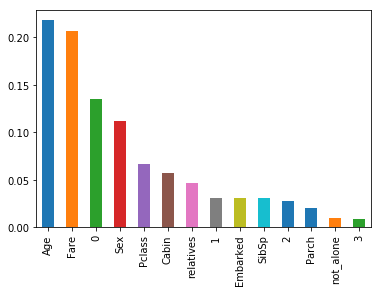

In [68]:
importances = pd.Series(np.round(random_forest.feature_importances_,3),index=features)
importances = importances.sort_values(ascending=False)
importances.plot.bar()

In [69]:
train_x = pd.DataFrame(train_x,columns=features)
test_x = pd.DataFrame(test_x,columns=features)

In [70]:
train_df = train_x.copy()
test_df = test_x.copy()

In [71]:
#removing less useful features from the dataset
train_x = train_x.drop(["not_alone",3,'Parch',2], axis=1)
test_x = test_df.drop(["not_alone",3,'Parch',2], axis=1)

In [72]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(train_x, train_y)
Y_prediction = random_forest.predict(test_x)
random_forest.score(train_x, train_y)
acc_random_forest = round(random_forest.score(train_x, train_y) * 100, 2)
print(round(acc_random_forest,2,), "%")

98.99 %


In [73]:
print("oob score:", round(random_forest.oob_score_, 4)*100,"%")

oob score: 81.03 %


In [74]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, train_x, train_y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.73333333 0.83333333 0.7752809  0.82022472 0.83146067 0.85393258
 0.79775281 0.76404494 0.86516854 0.85227273]
Mean: 0.812680456247872
Standard Deviation: 0.041404564003564175


In [82]:
param_grid = { "criterion" : ["gini", "entropy"],
"min_samples_leaf" : [1, 5, 10, 25, 50, 70],
"min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35],
"n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(max_features='auto',oob_score=True, random_state=0,n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid,n_jobs=-1)
clf.fit(train_x, train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=True, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 5, 10, 25, 50, 70], 'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35], 'n_estimators': [100, 400, 700, 1000, 1500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [75]:
from sklearn.externals import joblib 

# Save the model as a pickle in a file 
joblib.dump(clf, 'filename.pkl') 

# Load the model from the file 
clf_from_joblib = joblib.load('filename.pkl') 

# Use the loaded model to make predictions 
"""clf_from_joblib.predict(test_x) 
"""

NameError: name 'clf' is not defined

In [85]:
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 1500}

In [86]:
bestestimator = clf.best_estimator_

In [87]:
random_forest = bestestimator
random_forest.fit(train_x,train_y)
Y_prediction = random_forest.predict(test_x)
random_forest.score(train_x,train_y)
print("oob score:", round(random_forest.oob_score_, 4)*100,"%")

oob score: 82.72 %


In [88]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, train_x,train_y, cv=3,n_jobs=-1)
confusion_matrix(train_y, predictions)

array([[494,  55],
       [ 92, 250]], dtype=int64)

In [89]:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(train_y, predictions))
print("Recall:",recall_score(train_y, predictions))

Precision: 0.819672131147541
Recall: 0.7309941520467836


In [90]:
from sklearn.metrics import f1_score
f1_score(train_y, predictions)

0.7727975270479135

In [91]:
#y_scores = cross_val_predict(random_forest, train_x,train_y, cv=3,n_jobs=-1)
from sklearn.metrics import precision_recall_curve
y_scores = random_forest.predict_proba(train_x)
y_scores = y_scores[:,1]
#precision, recall, threshold = precision_recall_curve(train_y, predictions)
#previous i used the above thingy and that gives solid straight line doesn't expected
precision, recall, threshold = precision_recall_curve(train_y, y_scores)

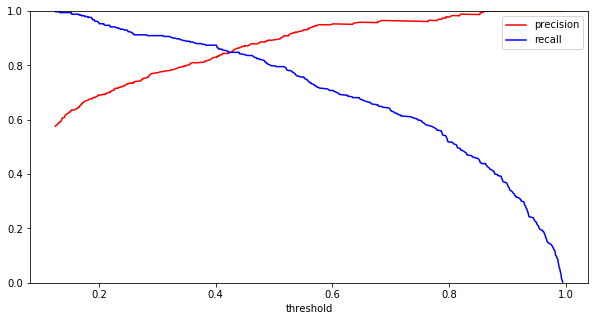

In [92]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-",label="precision")
    plt.plot(threshold, recall[:-1], "b", label="recall")
    plt.xlabel("threshold")
    plt.legend()
    plt.ylim([0, 1])
plt.figure(figsize=(10, 5))
plot_precision_and_recall(precision, recall, threshold)
    #plt.show()

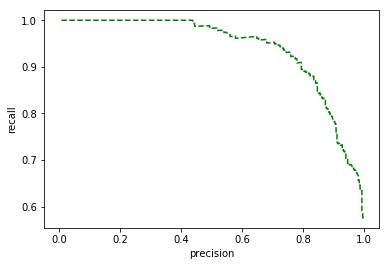

<Figure size 1008x504 with 0 Axes>

In [93]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--")
    plt.ylabel("recall")
    plt.xlabel("precision")
    plt.figure(figsize=(14, 7))
    
plot_precision_vs_recall(precision, recall)
plt.show()

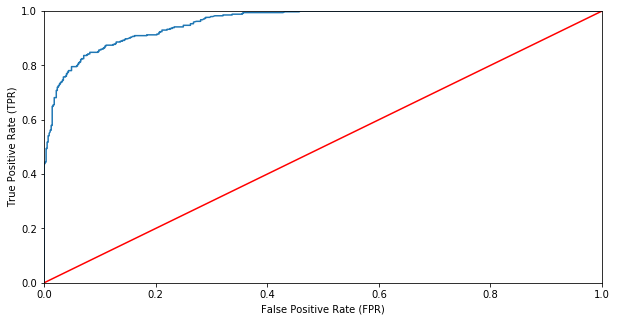

In [94]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds =roc_curve(train_y, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate,label=None):
    plt.plot(false_positive_rate, true_positive_rate,label=label)
    plt.plot([0, 1], [0, 1], 'r')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
plt.figure(figsize=(10,5))
plot_roc_curve(false_positive_rate, true_positive_rate)
#plt.show()

In [95]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(train_y, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9577514673143088


In [96]:
print("This is the prediction result of: \n",Y_prediction)

This is the prediction result of: 
 [0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1]


In [1]:
Y_prediction

NameError: name 'Y_prediction' is not defined

In [78]:
clf_from_joblib = joblib.load('filename.pkl')
pred = clf_from_joblib.predict(test_x)

In [87]:
df = pd.DataFrame([np.arange(892,len(pred)+892),pred]).T

In [89]:
df.columns = ['PassengerId','Survived']

In [95]:
df.to_csv('sol.csv',index=False)

In [93]:
pwd

'C:\\Users\\Mridul'